In [1]:
import sympy as sym
import numpy as np
import scipy as sp
from scipy import linalg,spatial

import matplotlib.pyplot as plt

In [2]:
# podatki
ρ = 2700
E = 70e9
L = 1

h = 0.030
A = h*h # mm^2
I = h*h**3/12 # mm^4

In [3]:
# transformacijska matrika
def T(α):
    
    T = np.array([[ np.cos(α), np.sin(α), 0,         0,         0, 0],
                   [-np.sin(α), np.cos(α), 0,         0,         0, 0],
                   [         0,         0, 1,         0,         0, 0],
                   [         0,         0, 0, np.cos(α), np.sin(α), 0],
                   [         0,         0, 0,-np.sin(α), np.cos(α), 0],
                   [         0,         0, 0,         0,         0, 1]])
        
    return T

In [4]:
# masna matrika
def M_e(A, L, ρ, α):

    M_lok = ρ*A*L*np.array([[1/3,         0,         0, 1/6,         0,         0],
                            [  0,     13/35,  11*L/210,   0,      9/70, -13*L/420],
                            [  0,  11*L/210,  L**2/105,   0,  13*L/420, -L**2/140],
                            [1/6,         0,         0, 1/3,         0,         0],
                            [  0,      9/70,  13*L/420,   0,     13/35, -11*L/210],
                            [  0, -13*L/420, -L**2/140,   0, -11*L/210,  L**2/105]])
    
    return T(α).T @ M_lok @ T(α)

In [5]:
# togostna matrika
def K_e(A, E, I, L, α):

    K_lok = E/L*np.array([[ A,          0,      0, -A,          0,      0],
                          [ 0,  12*I/L**2,  6*I/L,  0, -12*I/L**2,  6*I/L],
                          [ 0,      6*I/L,    4*I,  0,     -6*I/L,    2*I],
                          [-A,          0,      0,  A,          0,      0],
                          [ 0, -12*I/L**2, -6*I/L,  0,  12*I/L**2, -6*I/L],
                          [ 0,      6*I/L,    2*I,  0,     -6*I/L,    4*I]])
    
    return T(α).T @ K_lok @ T(α)

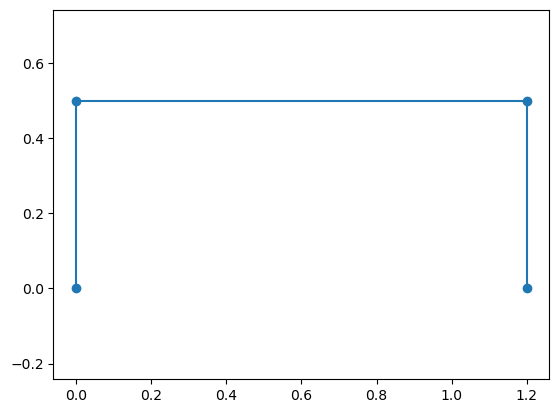

In [6]:
# vozlišča in elementi
%matplotlib inline
a = 1.2*L
b = 0.5*L
vozlisca = np.array([[0,0],[0,b],[a,b],[a,0]])
elementi = np.array([[0,1],[1,2],[2,3]])

[plt.plot(vozlisca[[i,j],0],vozlisca[[i,j],1],'-',c='C0') for i,j in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],'o');
plt.axis('equal');

In [7]:
n_e = 9
vozlisca_AB = np.array([[0, y] for y in np.linspace(0, b, n_e+1)])
vozlisca_BC = np.array([[x, b] for x in np.linspace(0, a, n_e+1)])[1:]
vozlisca_CD = np.array([[a, y] for y in np.linspace(b, 0, n_e+1)])[1:]


In [8]:
vozlisca_AB

array([[0.        , 0.        ],
       [0.        , 0.05555556],
       [0.        , 0.11111111],
       [0.        , 0.16666667],
       [0.        , 0.22222222],
       [0.        , 0.27777778],
       [0.        , 0.33333333],
       [0.        , 0.38888889],
       [0.        , 0.44444444],
       [0.        , 0.5       ]])

In [9]:
vozlisca_BC

array([[0.13333333, 0.5       ],
       [0.26666667, 0.5       ],
       [0.4       , 0.5       ],
       [0.53333333, 0.5       ],
       [0.66666667, 0.5       ],
       [0.8       , 0.5       ],
       [0.93333333, 0.5       ],
       [1.06666667, 0.5       ],
       [1.2       , 0.5       ]])

In [10]:
vozlisca_CD

array([[1.2       , 0.44444444],
       [1.2       , 0.38888889],
       [1.2       , 0.33333333],
       [1.2       , 0.27777778],
       [1.2       , 0.22222222],
       [1.2       , 0.16666667],
       [1.2       , 0.11111111],
       [1.2       , 0.05555556],
       [1.2       , 0.        ]])

In [11]:
vozlisca = np.vstack([vozlisca_AB, vozlisca_BC, vozlisca_CD])
vozlisca

array([[0.        , 0.        ],
       [0.        , 0.05555556],
       [0.        , 0.11111111],
       [0.        , 0.16666667],
       [0.        , 0.22222222],
       [0.        , 0.27777778],
       [0.        , 0.33333333],
       [0.        , 0.38888889],
       [0.        , 0.44444444],
       [0.        , 0.5       ],
       [0.13333333, 0.5       ],
       [0.26666667, 0.5       ],
       [0.4       , 0.5       ],
       [0.53333333, 0.5       ],
       [0.66666667, 0.5       ],
       [0.8       , 0.5       ],
       [0.93333333, 0.5       ],
       [1.06666667, 0.5       ],
       [1.2       , 0.5       ],
       [1.2       , 0.44444444],
       [1.2       , 0.38888889],
       [1.2       , 0.33333333],
       [1.2       , 0.27777778],
       [1.2       , 0.22222222],
       [1.2       , 0.16666667],
       [1.2       , 0.11111111],
       [1.2       , 0.05555556],
       [1.2       , 0.        ]])

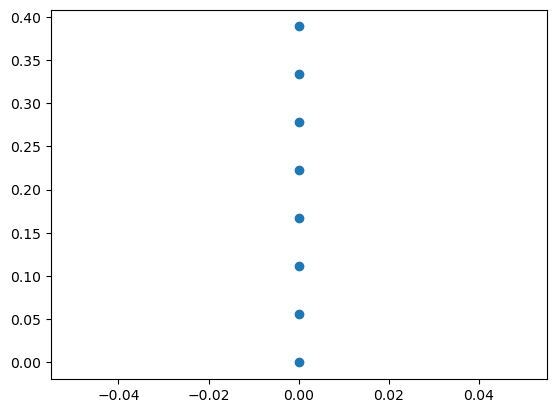

In [13]:
c = 8
plt.plot(vozlisca[:c, 0], vozlisca[:c, 1], 'o')

In [14]:
elementi = [[i, i+1] for i in range(len(vozlisca_s) - 1)]

[plt.plot(vozlisca[[i, j], 0], vozlisca[[i, j], 1], '.-') for i,j in elementi]
plt.show()

NameError: name 'vozlisca_s' is not defined

In [15]:
# zgostitev mreže

In [16]:
# sestav globalne masne in togostne matrike
M_glob = np.zeros((vozlisca.shape[0]*3,vozlisca.shape[0]*3))
K_glob = np.zeros((vozlisca.shape[0]*3,vozlisca.shape[0]*3))

for element in elementi:
    # dolžina elementa
    Le = sp.spatial.distance.euclidean(vozlisca[element[0]], vozlisca[element[1]])
    #Le = np.linalg.norm(vozlisca[element])
    
    # kot zasuka
    αe = np.arctan2(np.diff(vozlisca[element,1]) , np.diff(vozlisca[element,0]))[0]
    
    # indeksi prostostnih stopenj
    ind = np.array([3*element[0],3*element[0]+1,3*element[0]+2,3*element[1],3*element[1]+1,3*element[1]+2])
    
    # priševanje prispevkov posameznih elementov
    M_glob[ind[:,None],ind] += M_e(A, Le, ρ, αe)
    K_glob[ind[:,None],ind] += K_e(A, E, I, Le, αe)
M_glob.shape

(84, 84)

In [19]:
# C = np.zeros((ind_vpetih_ps.size,M_glob.shape[0]))
# for n, i in enumerate(ind_vpetih_ps):
#     C[n, i] = 1
#     print(n, i)
# C

In [20]:
np.arange(4)

array([0, 1, 2, 3])

In [21]:
# ROBNI POGOJI
ind_vpetih_ps = np.array([0,1,2,-2])

# tvorimo matriko C
C = np.zeros((ind_vpetih_ps.size,M_glob.shape[0]))
for n, i in enumerate(ind_vpetih_ps):
    C[n, i] = 1

L = sp.linalg.null_space(C)

M_glob_rp = L.T @ M_glob @ L
K_glob_rp = L.T @ K_glob @ L
# C[:, :3]

In [22]:
# lastne vrednosti in lastni vektorji
eig_val, eig_vec = sp.linalg.eig(K_glob_rp, M_glob_rp)

# urejanje po velikosti
_ind = np.argsort(np.abs(eig_val))
eig_val = eig_val[_ind]
eig_vec = eig_vec[:,_ind]
eig_vec = L @ eig_vec

eig_freq = np.abs(eig_val)**0.5 / 2 / np.pi

In [23]:
# lastne frekvence [Hz]
eig_freq[:4].round(1)

array([ 1629.4,  7725.1, 10827.1, 25265.1])

### Izris

In [24]:
m = 0
s = 1.5

pomiki_x = eig_vec[0::3,m]
pomiki_y = eig_vec[1::3,m]

def_vozlisca = np.copy(vozlisca)
def_vozlisca[:,0] += pomiki_x *s
def_vozlisca[:,1] += pomiki_y * s

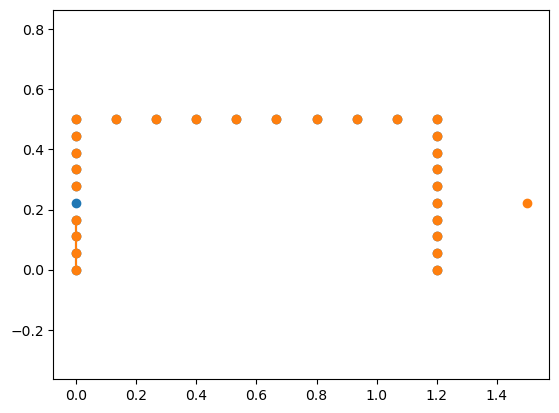

In [27]:
%matplotlib inline
# nedeformirana geometrija
[plt.plot(vozlisca[[i,j],0],vozlisca[[i,j],1],'-',c='C0') for i,j in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],'o');
# deformirana geometrija
[plt.plot(def_vozlisca[[i,j],0],def_vozlisca[[i,j],1],'-',c='C1') for i,j in elementi]
plt.plot(def_vozlisca[:,0],def_vozlisca[:,1],'o');
plt.axis('equal');
# plt.hlines(0,1.6, 0)

In [26]:
# animacija lastne oblike

In [ ]:
np.linspace(-1, 1, 10)

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [ ]:
import matplotlib.animation as animation
%matplotlib qt

# m = 5
# s = 2

amp = np.linspace(-1, 1, 25)
amp = np.block([amp, amp[::-1]])
amp = np.tile(amp, 20)

fig, ax = plt.subplots()


def animate(i):
    ax.set_xlim(-0.2*a, 1.8*a)
    ax.set_ylim(-0.2*b, 1.2*b)

    pomiki_x = eig_vec[0::3, m]
    pomiki_y = eig_vec[1::3, m]

    def_vozlisca = np.copy(vozlisca)
    def_vozlisca[:, 0] += pomiki_x * s * amp[i]
    def_vozlisca[:, 1] += pomiki_y * s * amp[i]

    return ax.plot(def_vozlisca[:, 0], def_vozlisca[:, 1], '-o', c='C0')


ani = animation.FuncAnimation(
    fig, animate, interval=5, blit=True, save_count=50)

plt.show()
